# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [9]:
df = pd.read_csv("Stock analysis.csv")
df

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


## Overview of the dataset

In [18]:
df.shape
df.head

<bound method NDFrame.head of             Date   Open   High    Low  Close   Volume  Stock Trading
0     2016-12-30  42120  42330  41700  41830   610000    25628028000
1     2016-12-29  43000  43220  42540  42660   448400    19188227000
2     2016-12-28  43940  43970  43270  43270   339900    14780670000
3     2016-12-27  43140  43700  43140  43620   400100    17427993000
4     2016-12-26  43310  43660  43090  43340   358200    15547803000
...          ...    ...    ...    ...    ...      ...            ...
1221  2012-01-11  14360  14750  14280  14590  1043400    15191988000
1222  2012-01-10  13890  14390  13860  14390   952300    13533413000
1223  2012-01-06  13990  14030  13790  13850   765500    10635609000
1224  2012-01-05  13720  13840  13600  13800   511500     7030811000
1225  2012-01-04  14050  14050  13700  13720   559100     7719804000

[1226 rows x 7 columns]>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


### Summary Statistics

In [23]:
df.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


## Missing Values

In [26]:

df.isnull()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1221,False,False,False,False,False,False,False
1222,False,False,False,False,False,False,False
1223,False,False,False,False,False,False,False
1224,False,False,False,False,False,False,False


In [28]:
df_clean = df.dropna()

In [31]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# EDA(EXPLORE DATA ANALYSIS)

### Correlation heatmap

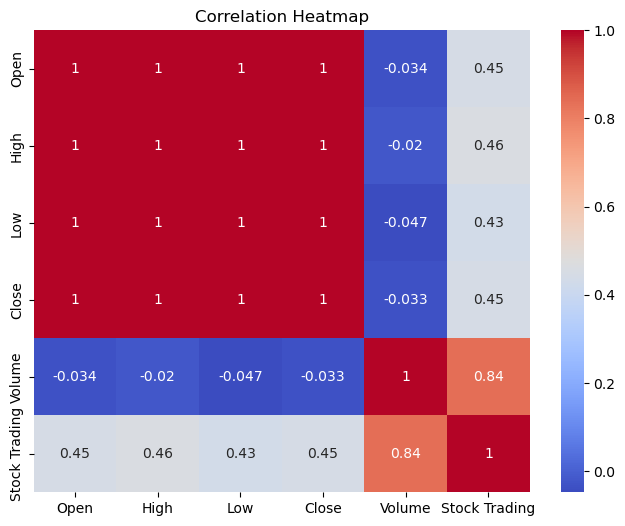

In [33]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Time-series plots for key metrics

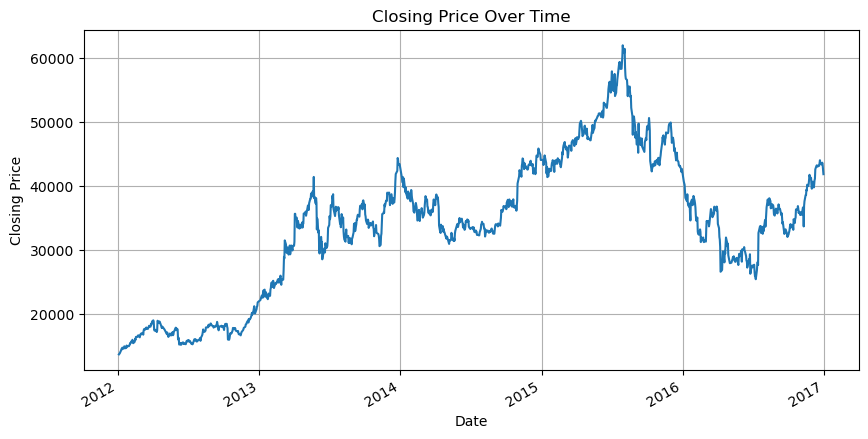

In [37]:

plt.figure(figsize=(10, 5))
df['Close'].plot()
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid()
plt.show()

### Boxplot for stock trading volume

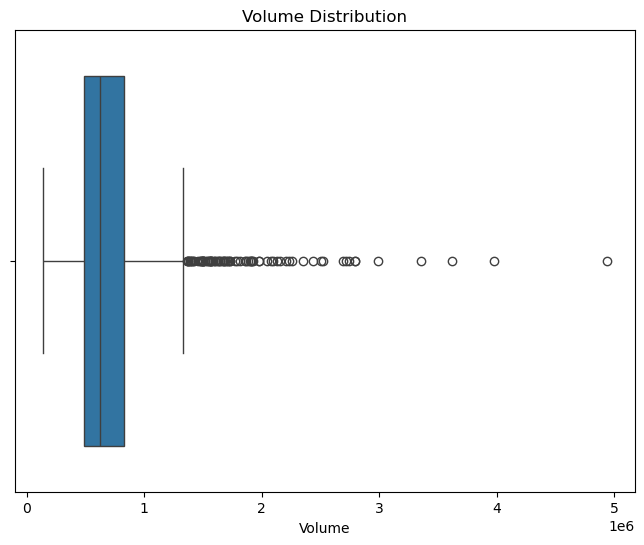

In [40]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Volume')
plt.title("Volume Distribution")
plt.show()

### Daily high-low price range

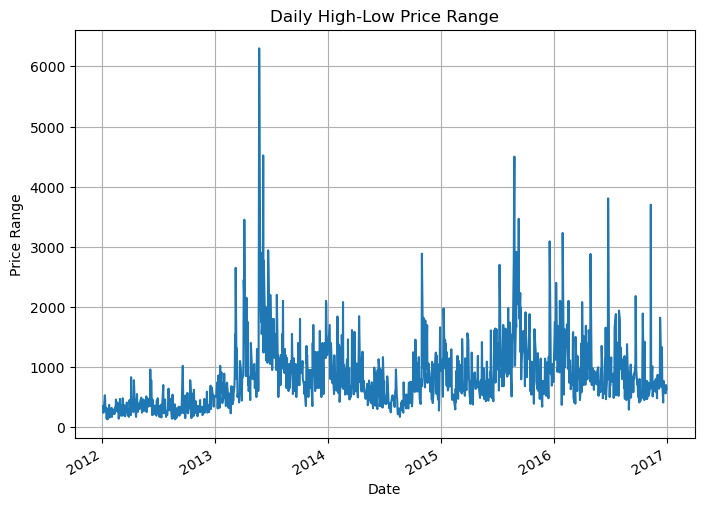

In [43]:

df['Range'] = df['High'] - df['Low']
plt.figure(figsize=(8, 6))
df['Range'].plot()
plt.title("Daily High-Low Price Range")
plt.xlabel("Date")
plt.ylabel("Price Range")
plt.grid()
plt.show()


### Moving average analysis

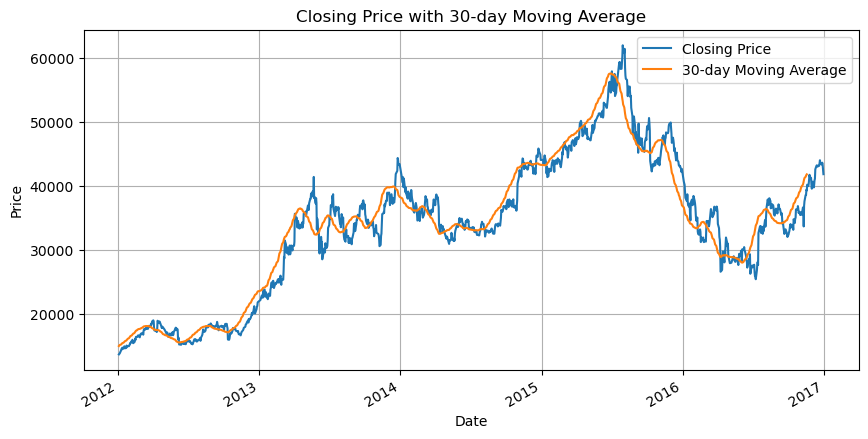

In [46]:

df['30-day MA'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(10, 5))
df['Close'].plot(label='Closing Price')
df['30-day MA'].plot(label='30-day Moving Average')
plt.title("Closing Price with 30-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

### Setting target and features (x,y)

In [54]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'                              


In [58]:
X = df[features]
y = df[target]


### Split the data into training and testing sets

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize the linear regression model

In [67]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()

In [72]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 60518.375600488966
R^2 Score: 0.9994808079304849


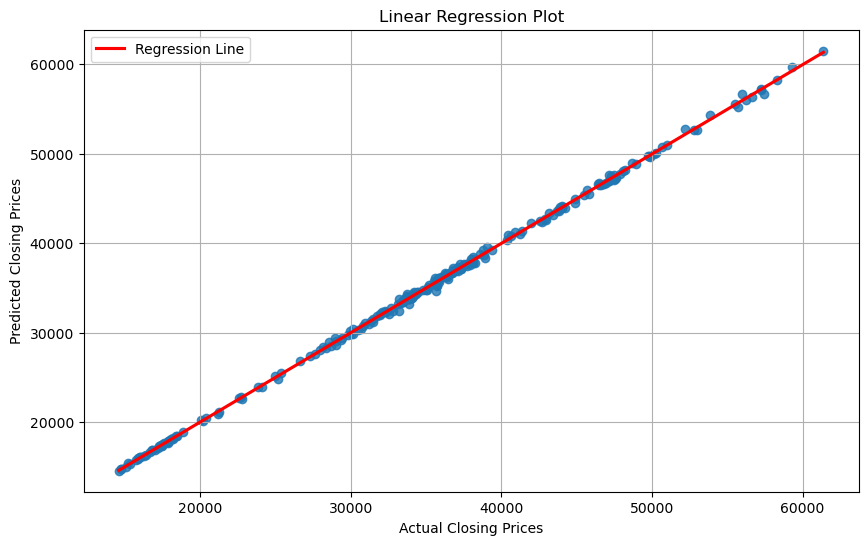

In [84]:

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test.values, y=y_pred, line_kws={"color": "red", "label": "Regression Line"})
plt.title("Linear Regression Plot")
plt.xlabel("Actual Closing Prices")
plt.ylabel("Predicted Closing Prices")
plt.legend()
plt.grid()
plt.show()
